In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -q japanize_matplotlib

import japanize_matplotlib
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

In [ ]:
df = pd.read_csv('/exercise.csv')
df.head(10)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1
6,9,280.20,1,0,Surburban,1,Phone,Buy One Get One,0
7,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0
8,9,675.07,1,1,Rural,1,Phone,Discount,0
9,10,32.84,0,1,Urban,1,Web,Buy One Get One,0


In [ ]:
df.shape

(64000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [ ]:
#以下各変数の集計を行う
df.describe(include='all')

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000,64000.000000,64000,64000,64000.000000
unique,NaN,NaN,NaN,NaN,3,NaN,3,3,NaN
top,NaN,NaN,NaN,NaN,Surburban,NaN,Web,Buy One Get One,NaN
freq,NaN,NaN,NaN,NaN,28776,NaN,28217,21387,NaN
mean,5.763734,242.085656,0.551031,0.549719,NaN,0.502250,NaN,NaN,0.146781
std,3.507592,256.158608,0.497393,0.497526,NaN,0.499999,NaN,NaN,0.353890
min,1.000000,29.990000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,2.000000,64.660000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
50%,6.000000,158.110000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
75%,9.000000,325.657500,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000


In [ ]:
!pip install -q japanize_matplotlib

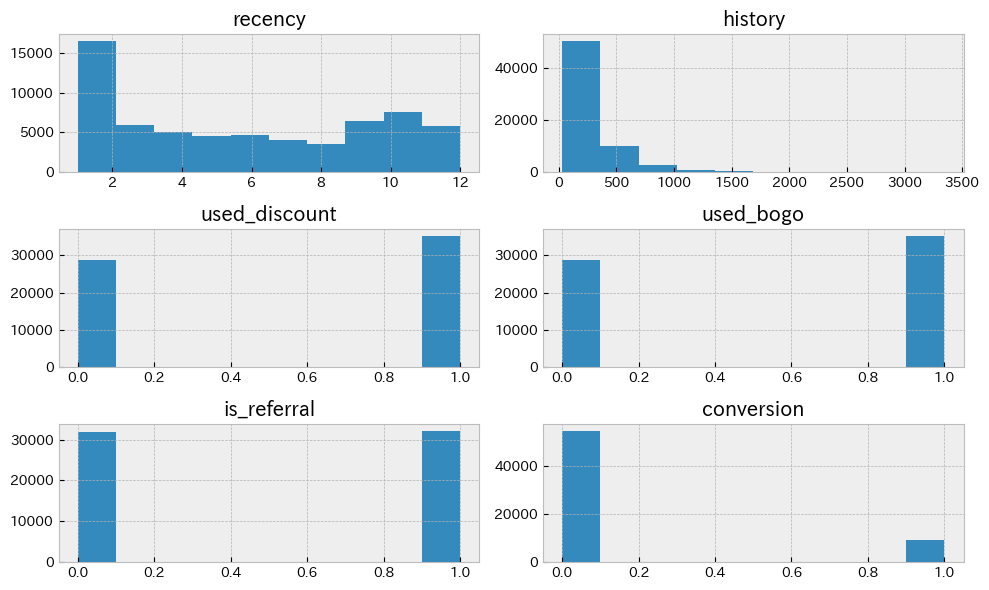

In [ ]:
#ヒストグラムを描画
plt.rcParams['figure.figsize'] = 10, 6
df.hist();
plt.tight_layout();

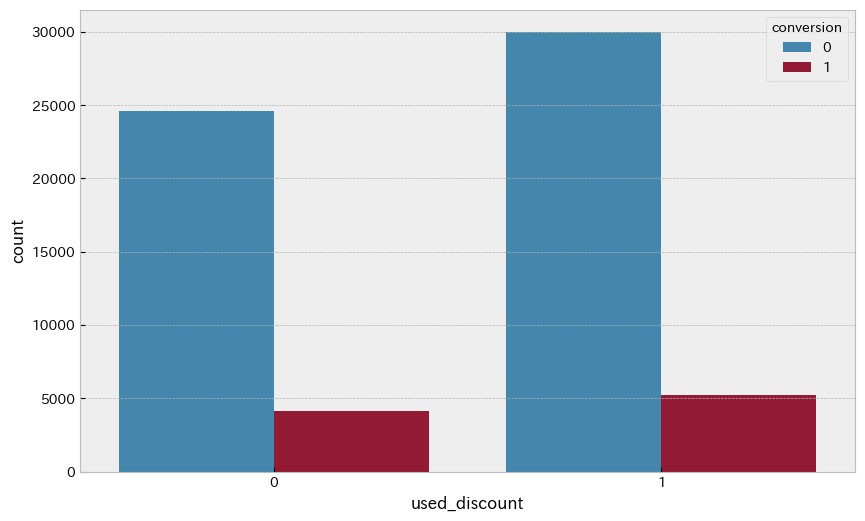

In [ ]:
#割引を利用の有無とコンバージョンのクロス集計
sns.countplot(x='used_discount', hue='conversion', data=df);

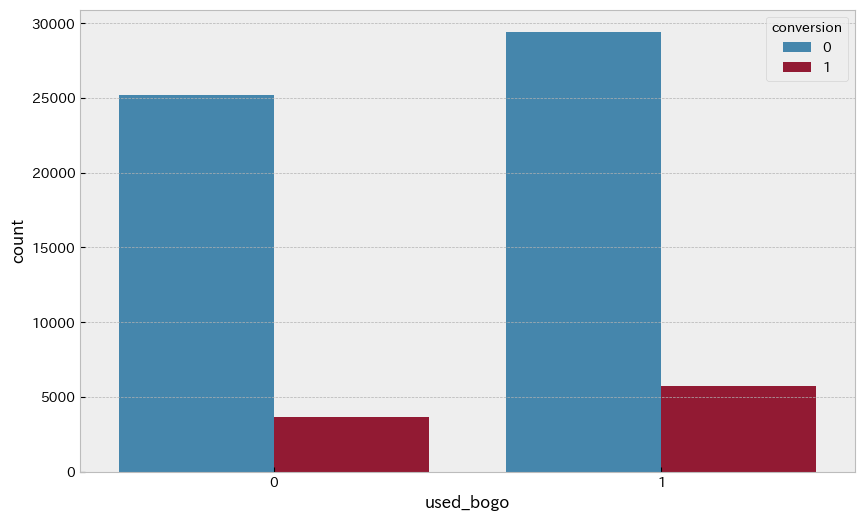

In [ ]:
#Buy One Get Oneの利用の有無とコンバージョンのクロス集計
sns.countplot(x='used_bogo', hue='conversion', data=df);

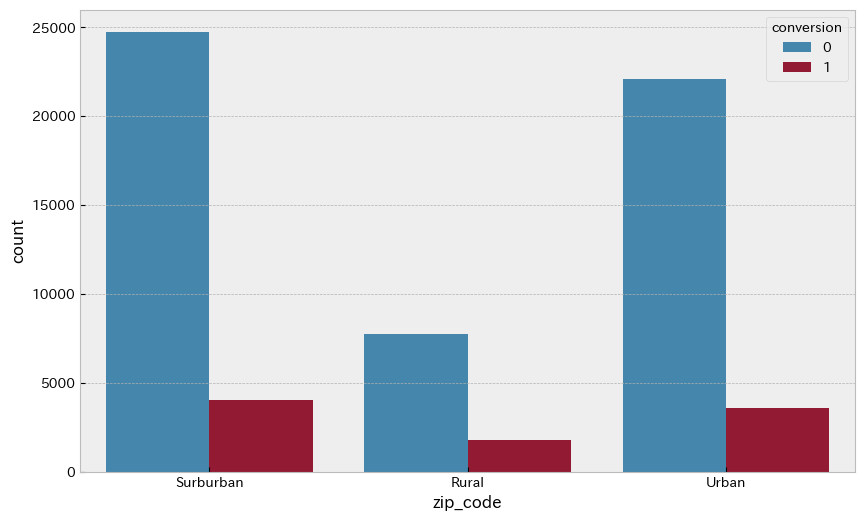

In [ ]:
#居住地郵便番号とコンバージョンのクロス集計
sns.countplot(x='zip_code', hue='conversion', data=df);

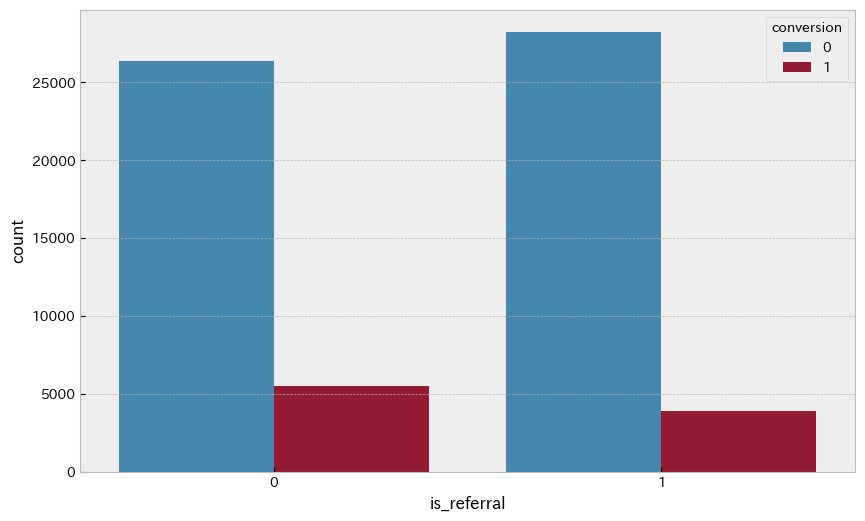

In [ ]:
#リファラルで購入したかどうかとコンバージョンのクロス集計
sns.countplot(x='is_referral', hue='conversion', data=df);

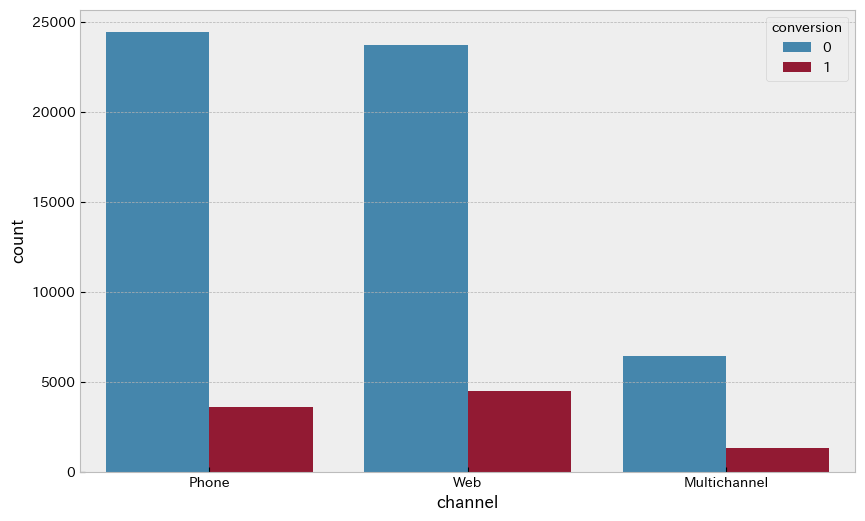

In [ ]:
#顧客が購入しているチャネルとコンバージョンのクロス集計
sns.countplot(x='channel', hue='conversion', data=df);

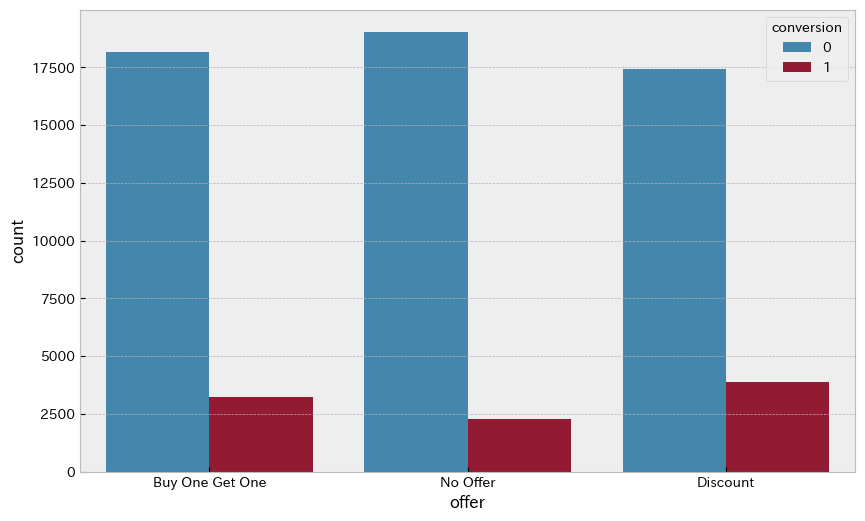

In [ ]:
#オファーとコンバージョンのクロス集計
sns.countplot(x='offer', hue='conversion', data=df);

In [ ]:
#可視化してわかりにくいところを集計して検討する

In [ ]:
#居住地域別の平均値
group = df.groupby('zip_code')

group.mean()

,recency,history,used_discount,used_bogo,is_referral,conversion
zip_code,,,,,,
Rural,5.730210,242.853935,0.552023,0.547527,0.496601,0.188121
Surburban,5.803100,240.488905,0.549034,0.550111,0.503371,0.139943
Urban,5.732084,243.589924,0.552901,0.550095,0.503098,0.139044


In [ ]:
#居住地域とコンバージョンの関係性
pd.crosstab(df['conversion'], df['zip_code'])

zip_code,Rural,Surburban,Urban
conversion,,,
0,7764,24749,22093
1,1799,4027,3568


In [ ]:
#顧客が利用している購入チャネルの平均値
group = df.groupby('channel')

group.mean()

,recency,history,used_discount,used_bogo,is_referral,conversion
channel,,,,,,
Multichannel,4.768488,520.970370,0.632698,0.624195,0.595723,0.171734
Phone,5.897541,202.807184,0.539203,0.538953,0.493309,0.127155
Web,5.904632,204.375017,0.540313,0.539923,0.485417,0.159407


In [ ]:
#購入チャネルとコンバージョンの関係性
pd.crosstab(df['conversion'], df['channel'])

channel,Multichannel,Phone,Web
conversion,,,
0,6429,24458,23719
1,1333,3563,4498


In [ ]:
#割引の利用の有無の平均値
group = df.groupby('used_discount')

group.mean()

,recency,history,used_bogo,is_referral,conversion
used_discount,,,,,
0,5.885501,210.109902,1.000000,0.490673,0.144150
1,5.664521,268.138832,0.182839,0.511683,0.148925


In [ ]:
#割引利用の有無とコンバージョンの関係性
pd.crosstab(df['conversion'], df['used_discount'])

used_discount,0,1
conversion,,
0,24592,30014
1,4142,5252


In [ ]:
#bogoの利用の有無の平均値
group = df.groupby('used_bogo')

group.mean()

,recency,history,used_discount,is_referral,conversion
used_bogo,,,,,
0,5.866889,209.626353,1.000000,0.490457,0.126449
1,5.679239,268.673462,0.183276,0.511909,0.163436


In [ ]:
#リファラルの平均値
group = df.groupby('is_referral')

group.mean()

,recency,history,used_discount,used_bogo,conversion
is_referral,,,,,
0,5.947325,184.633287,0.540589,0.539051,0.173060
1,5.581788,299.023269,0.561380,0.560291,0.120738


In [ ]:
#オファーの平均値
group = df.groupby('offer')

group.mean()

,recency,history,used_discount,used_bogo,is_referral,conversion
offer,,,,,,
Buy One Get One,5.767850,242.536633,0.548932,0.550101,0.503250,0.151400
Discount,5.773642,242.835931,0.550946,0.551415,0.501525,0.182757
No Offer,5.749695,240.882653,0.553224,0.547639,0.501971,0.106167


In [ ]:
#コンバージョンの各平均値
group = df.groupby('conversion')

group.mean()

,recency,history,used_discount,used_bogo,is_referral
conversion,,,,,
0,5.872505,235.163403,0.549647,0.538988,0.517580
1,5.131467,282.323739,0.559080,0.612093,0.413136


In [ ]:
#以上の単純集計から考えられる仮説
#コンバージョンしている人の方が過去の購入品の価値の平均値が高い
#コンバージョンしている人の方が前回の購入からの月数が短い
#bogoを利用したことがある人の方がコンバージョンしている
#農村の人の方がコンバージョンしている
#マルチチャンネルを利用している人の方がコンバージョンしている
#オファーなしよりbogoか割引をおくったほうがコンバージョンしている。特に割引の方がコンバージョンしている
#リファラルで流入していない人の方がコンバージョンしている

In [ ]:
#以下仮説を検証する
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

In [ ]:
#コンバージョンしている人の方が過去の購入品の価値が高いのかどうかを調べる。
#帰無仮説：コンバージョンの有無で、過去の購入品の価値に差がない
#対立仮説：コンバージョンしていない人の方が、過去の購入品の価値が低い
group1 = group.get_group(0)
group2 = group.get_group(1)

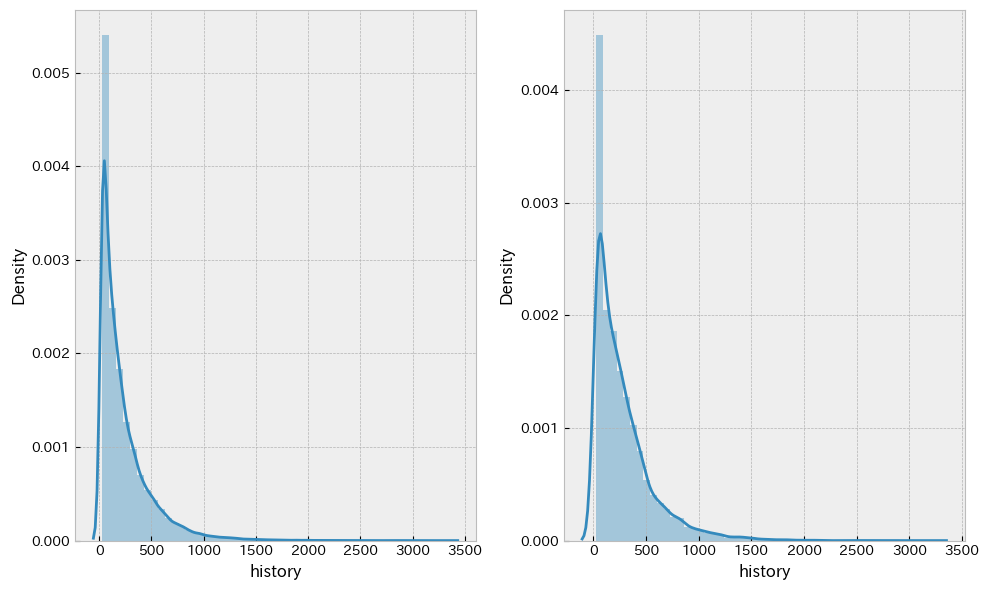

In [ ]:
plt.subplot(1, 2, 1)
sns.distplot(group1['history'])
plt.subplot(1, 2, 2)
sns.distplot(group2['history'])
plt.tight_layout()

In [ ]:
stats.kstest(group1['history'],"norm")

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

In [ ]:
stats.kstest(group2['history'],"norm")
#正規分布ではないと言える

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)

In [ ]:
stats.mannwhitneyu(group1['history'], group2['history'], alternative='less')
#p値が0.05より小さいため、帰無仮説は棄却できる。したがって、コンバージョンしている人の方が過去の購入品の価値の平均が高いことがわかった。

MannwhitneyuResult(statistic=227167236.0, pvalue=1.003083252661162e-70)

In [ ]:
#以下コンバージョンしている人の方が前回の購入からの月数が短いことを明らかにする
#帰無仮説：コンバージョンの有無と前回購入の月数の平均の差がない
#対立仮説：コンバージョンしていない方が前回購入からの月数の平均が長い

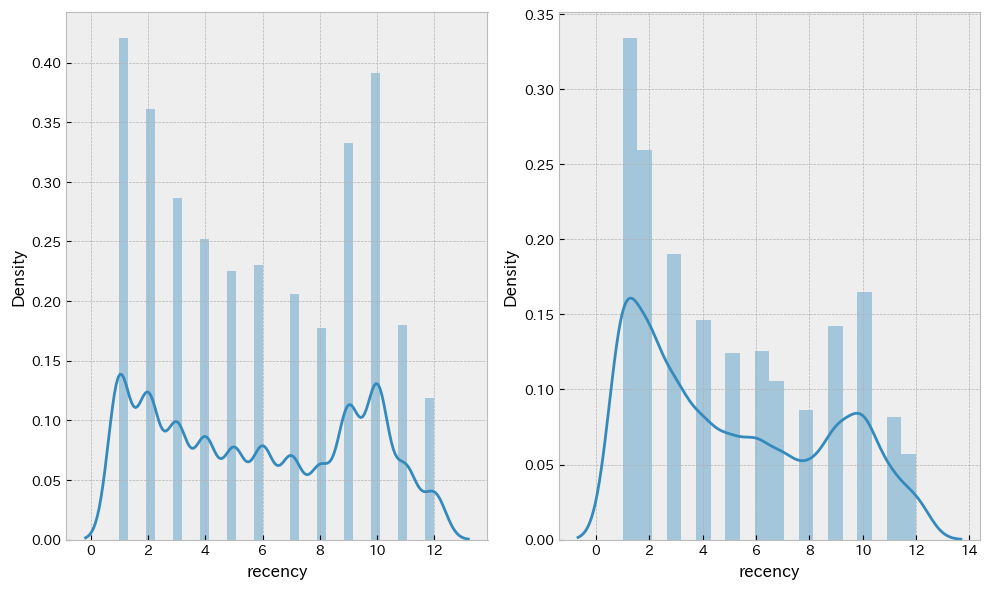

In [ ]:
plt.subplot(1, 2, 1)
sns.distplot(group1['recency'])
plt.subplot(1, 2, 2)
sns.distplot(group2['recency'])
plt.tight_layout()

In [ ]:
stats.shapiro(group1['recency'])

ShapiroResult(statistic=0.9197489619255066, pvalue=0.0)

In [ ]:
stats.shapiro(group2['recency'])
#正規分布ではないと言える

ShapiroResult(statistic=0.9004722237586975, pvalue=0.0)

In [ ]:
stats.mannwhitneyu(group1['recency'], group2['recency'], alternative='greater')
#p値は０．０５より小さいので、帰無仮説は棄却できる。したがって、コンバージョンしている人の方が前回の購入からの月数が短いと言える。

MannwhitneyuResult(statistic=287976211.5, pvalue=6.825578262087337e-82)

In [ ]:
#以前にBOGOを利用したことがあることとコンバージョンに関連があるかを調べる
#帰無仮説：2群間は独立
#対立仮説：２群間は独立ではない
crosstab = pd.crosstab(df['used_bogo'], df['conversion'])
crosstab

conversion,0,1
used_bogo,,
0,25174,3644
1,29432,5750


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:173.0509512533343
p 値:1.595298975970467e-39
自由度:1


In [ ]:
print(ef)
#p値が0．05より小さいので、帰無仮説は棄却できる。したがって、以前にBOGOを利用したことがあることとコンバージョンに関連があると言える。

[[24588.0579375  4229.9420625]
 [30017.9420625  5164.0579375]]


In [ ]:
#以下居住地のカテゴリとコンバージョンの有無に関連があるのかを調べる
#帰無仮説：2群間は独立
#対立仮説：２群間は独立ではない
crosstab = pd.crosstab(df['zip_code'], df['conversion'])
crosstab

conversion,0,1
zip_code,,
Rural,7764,1799
Surburban,24749,4027
Urban,22093,3568


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:153.50767890534956
p 値:4.636935563366961e-34
自由度:2


In [ ]:
print(ef)
#p値は0．05より小さいので帰無仮説は棄却できる。したがって、居住地のカテゴリとコンバージョンの有無に関連があると言える。

[[ 8159.33090625  1403.66909375]
 [24552.22275     4223.77725   ]
 [21894.44634375  3766.55365625]]


In [ ]:
#以下リファラル流入とコンバージョンの有無に関連があるのかを調べる
#帰無仮説：2群間は独立
#対立仮説：２群間は独立ではない
crosstab = pd.crosstab(df['is_referral'], df['conversion'])
crosstab

conversion,0,1
is_referral,,
0,26343,5513
1,28263,3881


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:349.7440987142954
p 値:4.817988877193599e-78
自由度:1


In [ ]:
print(ef)
#p値は0．05より小さいので帰無仮説は棄却できる。したがって、リファラル流入とコンバージョンの有無に関連があると言える。

[[27180.1365  4675.8635]
 [27425.8635  4718.1365]]


In [ ]:
#以下顧客が購入するチャネルとコンバージョンの有無に関連があるのかを調べる
#帰無仮説：2群間は独立
#対立仮説：２群間は独立ではない
crosstab = pd.crosstab(df['channel'], df['conversion'])
crosstab

conversion,0,1
channel,,
Multichannel,6429,1333
Phone,24458,3563
Web,23719,4498


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:160.69711674409655
p 値:1.2736921440078863e-35
自由度:2


In [ ]:
print(ef)
#p値は0．05より小さいので帰無仮説は棄却できる。したがって、購入チャネルとコンバージョンの有無に関連があると言える。

[[ 6622.6839375   1139.3160625 ]
 [23908.04259375  4112.95740625]
 [24075.27346875  4141.72653125]]


In [ ]:
#以下顧客に送られるオファーとコンバージョンの有無に関連があるのかを調べる
#帰無仮説：2群間は独立
#対立仮説：２群間は独立ではない
crosstab = pd.crosstab(df['offer'], df['conversion'])
crosstab

conversion,0,1
offer,,
Buy One Get One,18149,3238
Discount,17413,3894
No Offer,19044,2262


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:504.46066903563496
p 値:2.869178384267155e-110
自由度:2


In [ ]:
print(ef)
#p値は0．05より小さいので帰無仮説は棄却できる。したがって、顧客に送られるオファーとコンバージョンの有無に関連があると言える。

[[18247.78940625  3139.21059375]
 [18179.53190625  3127.46809375]
 [18178.6786875   3127.3213125 ]]


In [ ]:
#各変数の相関係数
df.corr()

,recency,history,used_discount,used_bogo,is_referral,conversion
recency,1.000000,-0.246591,-0.031336,-0.026617,-0.052106,-0.074765
history,-0.246591,1.000000,0.112677,0.114685,0.223279,0.065153
used_discount,-0.031336,0.112677,1.000000,-0.816943,0.020900,0.006712
used_bogo,-0.026617,0.114685,-0.816943,1.000000,0.021346,0.051999
is_referral,-0.052106,0.223279,0.020900,0.021346,1.000000,-0.073924
conversion,-0.074765,0.065153,0.006712,0.051999,-0.073924,1.000000


In [ ]:
#以上の検定の結果を整理する。
#コンバージョンしている人の方が過去の購入品の価値の平均が高い
#コンバージョンしている人の方が前回の購入からの月数が短い
#以前にBOGOを利用したことがあることとコンバージョンに関連がある
#居住地のカテゴリとコンバージョンの有無に関連がある
#リファラル流入とコンバージョンの有無に関連がある
#購入チャネルとコンバージョンの有無に関連がある
#顧客に送られるオファーとコンバージョンの有無に関連がある

In [ ]:
#カテゴリカル変数を特定
df.select_dtypes(include='object').columns

Index(['zip_code', 'channel', 'offer'], dtype='object')

In [ ]:
# 数値化（OneHotEncoding）
_df = pd.get_dummies(df)
_df.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,0,0,1,0,0,1,0,1,0,0
1,6,329.08,1,1,1,0,1,0,0,0,0,1,0,0,1
2,7,180.65,0,1,1,0,0,1,0,0,0,1,1,0,0
3,9,675.83,1,0,1,0,1,0,0,0,0,1,0,1,0
4,2,45.34,1,0,0,0,0,0,1,0,0,1,1,0,0


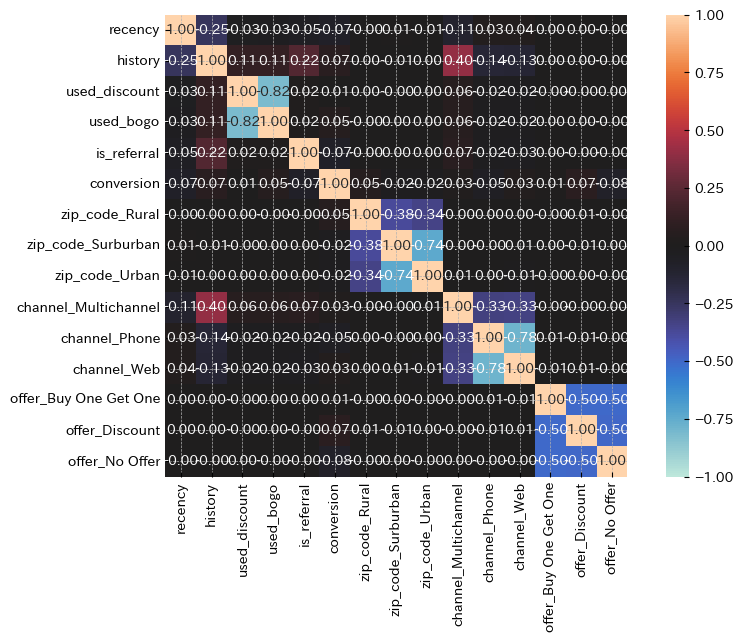

In [ ]:
#相関分析
sns.heatmap(_df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [ ]:
#BOGOと割引で強い負の相関関係がある
#都会と郊外で強い負の相関関係がある
#Webと電話で強い負の相関関係がある

In [ ]:
#重回帰分析を行う
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
x = _df.drop('conversion', axis=1)
y = _df['conversion']

In [ ]:
x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns=_df.drop('conversion', axis=1).columns)
feature.head()

,recency,history,used_discount,used_bogo,is_referral,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
0,1.207751,-0.389003,0.902651,-1.104914,-1.00451,-0.419131,1.106380,-0.818119,-0.371511,1.133138,-0.888008,1.411550,-0.706452,-0.706427
1,0.067359,0.339614,0.902651,0.905048,0.99551,2.385888,-0.903849,-0.818119,-0.371511,-0.882505,1.126116,-0.708441,-0.706452,1.415574
2,0.352457,-0.239836,-1.107848,0.905048,0.99551,-0.419131,1.106380,-0.818119,-0.371511,-0.882505,1.126116,1.411550,-0.706452,-0.706427
3,0.922653,1.693278,0.902651,-1.104914,0.99551,2.385888,-0.903849,-0.818119,-0.371511,-0.882505,1.126116,-0.708441,1.415524,-0.706427
4,-1.073034,-0.768068,0.902651,-1.104914,-1.00451,-0.419131,-0.903849,1.222316,-0.371511,-0.882505,1.126116,1.411550,-0.706452,-0.706427


In [ ]:
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             conversion   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:15:20   Log-Likelihood:                -23208.
No. Observations:               64000   AIC:                         4.644e+04
Df Residuals:                   63988   BIC:                         4.655e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1468      0.001    106.775      0.000       0.144       0.149
recency                  -0.0220      0.001    -15.540      0.000      -0.025      -0.019
history                   0.0145      0.002      8.706      0.000       0.011       0.018
used_discount             0.0442      0.003     17.268      0.000       0.039       0.049
used_bogo                 0.0530      0.003     20.703      0.000       0.048       0.058
is_referral              -0.0323      0.001    -22.860      0.000      -0.035      -0.029
zip_code_Rural            0.0135      0.001     12.332      0.000       0.011       0.016
zip_code_Surburban       -0.0044      0.001     -5.377      0.000      -0.006      -0.003
zip_code_Urban           -0.0053      0.001     -6.241      0.000      -0.007      -0.004
channel_Multichannel     -0.0018      0.001     -1.444      0.149      -0.004       0.001
channel_Phone            -0.0072      0.001     -8.582      0.000      -0.009      -0.006
channel_Web               0.0083      0.001     10.007      0.000       0.007       0.010
offer_Buy One Get One     0.0023      0.001      2.565      0.010       0.001       0.004
offer_Discount            0.0167      0.001     18.255      0.000       0.015       0.019
offer_No Offer           -0.0191      0.001    -20.820      0.000      -0.021      -0.017
==============================================================================
Omnibus:                    20397.703   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47287.860
Skew:                           1.892   Prob(JB):                         0.00
Kurtosis:                       4.849   Cond. No.                     7.29e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 自由度調整済み決定係数
result.rsquared_adj

0.034301038563986586

In [ ]:
# 説明変数とt,p値, 標準偏回帰係数のデータフレームを作成
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['t', 'p', 'coef']).T
res_values

,t,p,coef
recency,-15.539503,2.356951e-54,-0.022044
history,8.706340,3.211528e-18,0.014495
used_discount,17.267692,1.167268e-66,0.044176
used_bogo,20.703281,6.633969e-95,0.052972
is_referral,-22.860347,3.346009e-115,-0.032253
zip_code_Rural,12.332145,6.662593e-35,0.013450
zip_code_Surburban,-5.377037,7.598622e-08,-0.004444
zip_code_Urban,-6.241217,4.368902e-10,-0.005273
channel_Multichannel,-1.443760,1.488114e-01,-0.001787
channel_Phone,-8.581673,9.555896e-18,-0.007166


In [ ]:
# 条件抽出
# t値の絶対値が2以上かつp値が5%以下
res_values[(res_values['t'].abs()>=2.0)&(res_values['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
used_bogo,20.703281,6.633969e-95,0.052972
offer_Discount,18.255100,2.911645e-74,0.016736
used_discount,17.267692,1.167268e-66,0.044176
zip_code_Rural,12.332145,6.662593e-35,0.013450
channel_Web,10.006692,1.482363e-23,0.008335
history,8.706340,3.211528e-18,0.014495
offer_Buy One Get One,2.564669,1.032970e-02,0.002349
zip_code_Surburban,-5.377037,7.598622e-08,-0.004444
zip_code_Urban,-6.241217,4.368902e-10,-0.005273
channel_Phone,-8.581673,9.555896e-18,-0.007166


In [ ]:
# 相関関係と比較
tmp = df.corr()['conversion']
tmp[tmp.abs()>0.5].sort_values(ascending=False)

conversion    1.0
Name: conversion, dtype: float64

In [ ]:
#重回帰分析の結果、t値の絶対値の大きさから、リファラルかどうか、BOGOを使ったか、割引を利用したか、前回購入からの月数が特に影響していることがわかった。

In [ ]:
#以下クラスタリングを行う

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(_df)
x_scaled[0]

array([ 1.20775141, -0.38900287,  0.90265115, -1.10491366, -1.00451017,
       -0.41476786, -0.4191312 ,  1.10637951, -0.81811885, -0.37151118,
        1.1331378 , -0.88800834,  1.41154953, -0.70645226, -0.7064274 ])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse = []

for i  in range(1,12):                # 1~10クラスタまで一気に計算
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_scaled)             # クラスタリングの計算を実行
    sse.append(kmeans.inertia_)   # kmeans.fitするとkmeans.inertia_が得られる

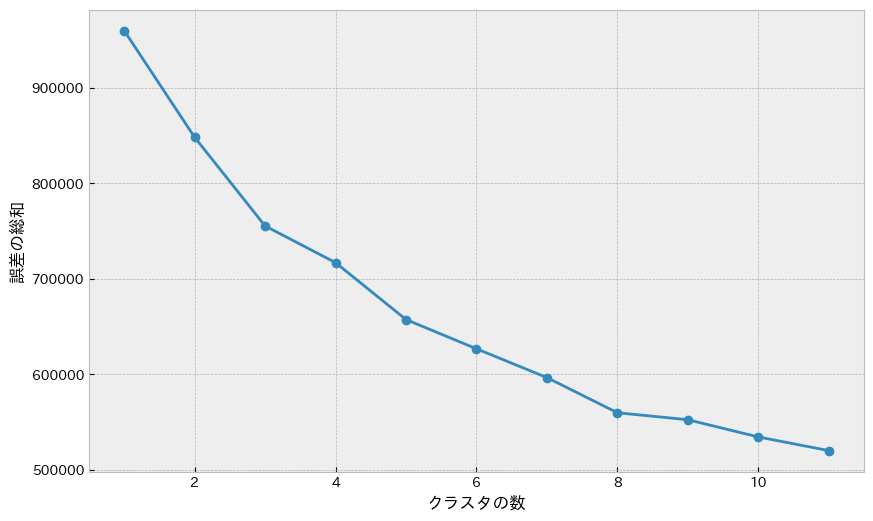

In [ ]:
plt.plot(range(1,12), sse , marker='o')
plt.xlabel('クラスタの数')
plt.ylabel('誤差の総和')
plt.show()

In [ ]:
#クラスタ数２で折れ曲がっているように見えるので、２を採用
kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(x_scaled)

cluster = kmeans.labels_
print(cluster)

[0 1 1 ... 0 1 1]


In [ ]:
#cluster、conversionのカラム追加
df['cluster'] = cluster

In [ ]:
# クラスターごとにグループ分け
groups = df.groupby('cluster')
groups.size()

cluster
0    28021
1    35979
dtype: int64

In [ ]:
# 代表値を取得
groups.agg(['min', 'max', 'mean', 'median'])

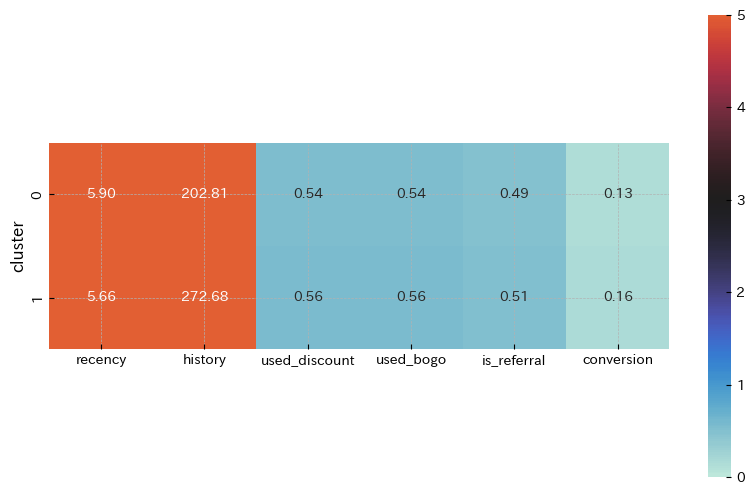

In [ ]:
mean = groups.mean()
sns.heatmap(mean, square=True, annot=True, fmt='.2f', vmax=5.0, center=3.0, vmin=0.0);


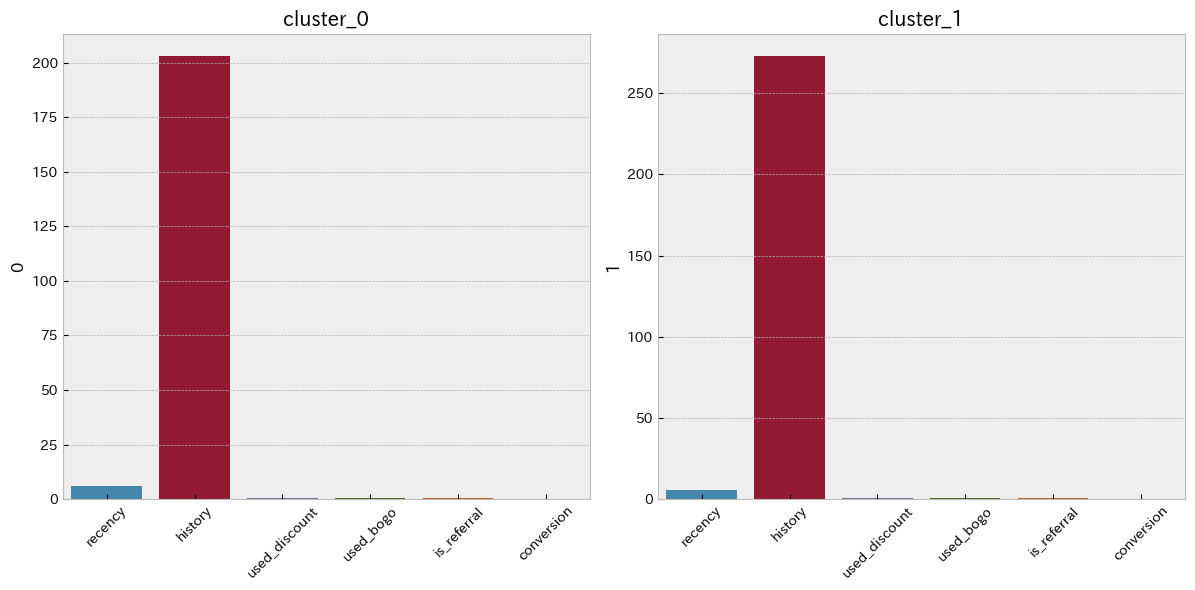

In [ ]:
# クラスタの数を取得
num = kmeans.n_clusters

# クラスターごとに可視化して確認
plt.figure(figsize=(18, 6))

for n in range(num):
    plt.subplot(1, 3, n+1)
    plt.title(f'cluster_{n}')
    sns.barplot(x=mean.columns, y=mean.loc[n])
    plt.xticks(rotation=45) # 凡例を 45 ℃ 傾けて表示
    plt.tight_layout() # 文字の頭などがないように表示

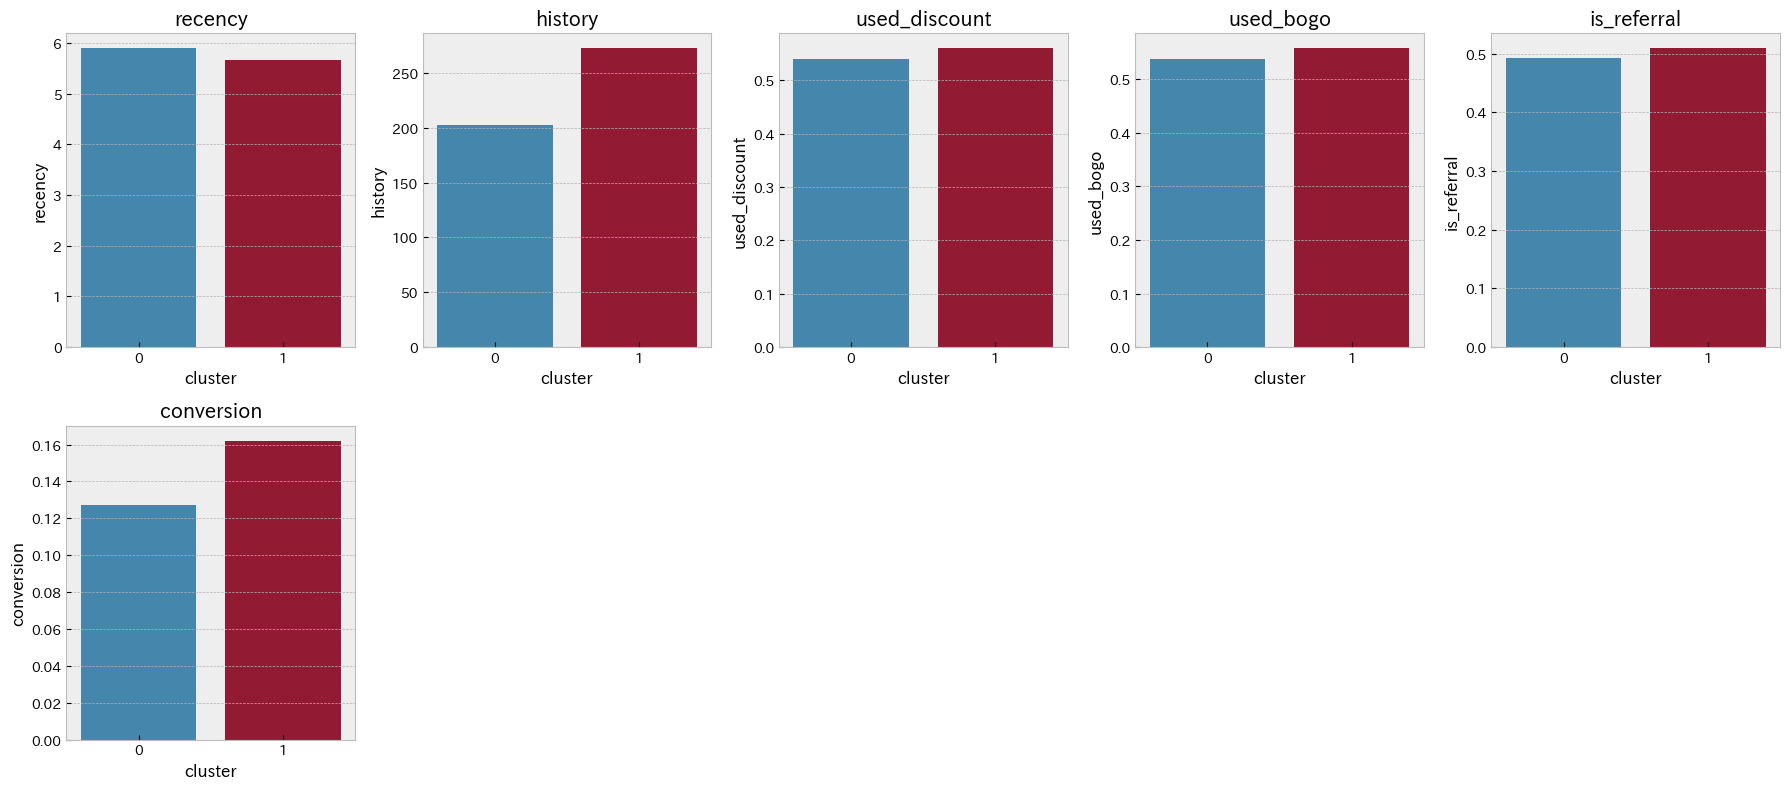

In [ ]:
# 各変数毎に可視化して確認
plt.figure(figsize=(18, 8))

for i, col in enumerate(mean.columns):
    plt.subplot(2, 5, i+1)
    plt.title(f'{col}')
    sns.barplot(x=mean.index, y=mean[col])
    plt.tight_layout()

In [ ]:
cluster_0 = groups.get_group(0)
cluster_0 = cluster_0.reset_index(drop=True)
cluster_0.head(2)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,cluster
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0,0
1,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1,0


In [ ]:
cluster_1 = groups.get_group(1)
cluster_1 = cluster_1.reset_index(drop=True)

In [ ]:
# 箱ひげ図可視化用の関数
def box_plot(col1, col2, dflist, high=6, width=18):
    plt.rcParams['figure.figsize'] = width, high

    for i, cluster in enumerate(dflist):
        plt.subplot(1, len(dflist), i+1)
        plt.title(f'クラスター{i}：{col1}と{col2}')
        sns.boxplot(x=col1, y=col2, data=cluster)
        plt.tight_layout();

In [ ]:
df_list = [cluster_0, cluster_1]

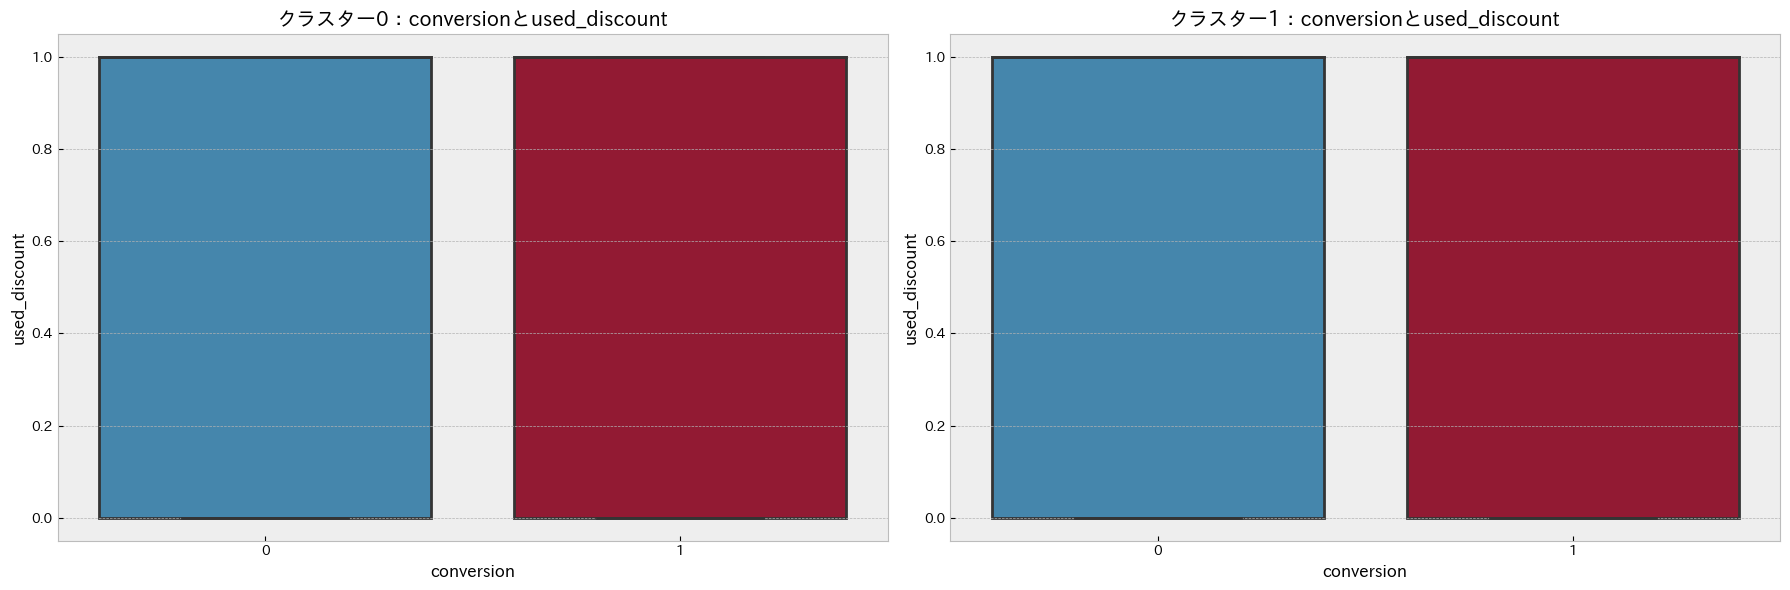

In [ ]:
box_plot('conversion', 'used_discount', df_list)

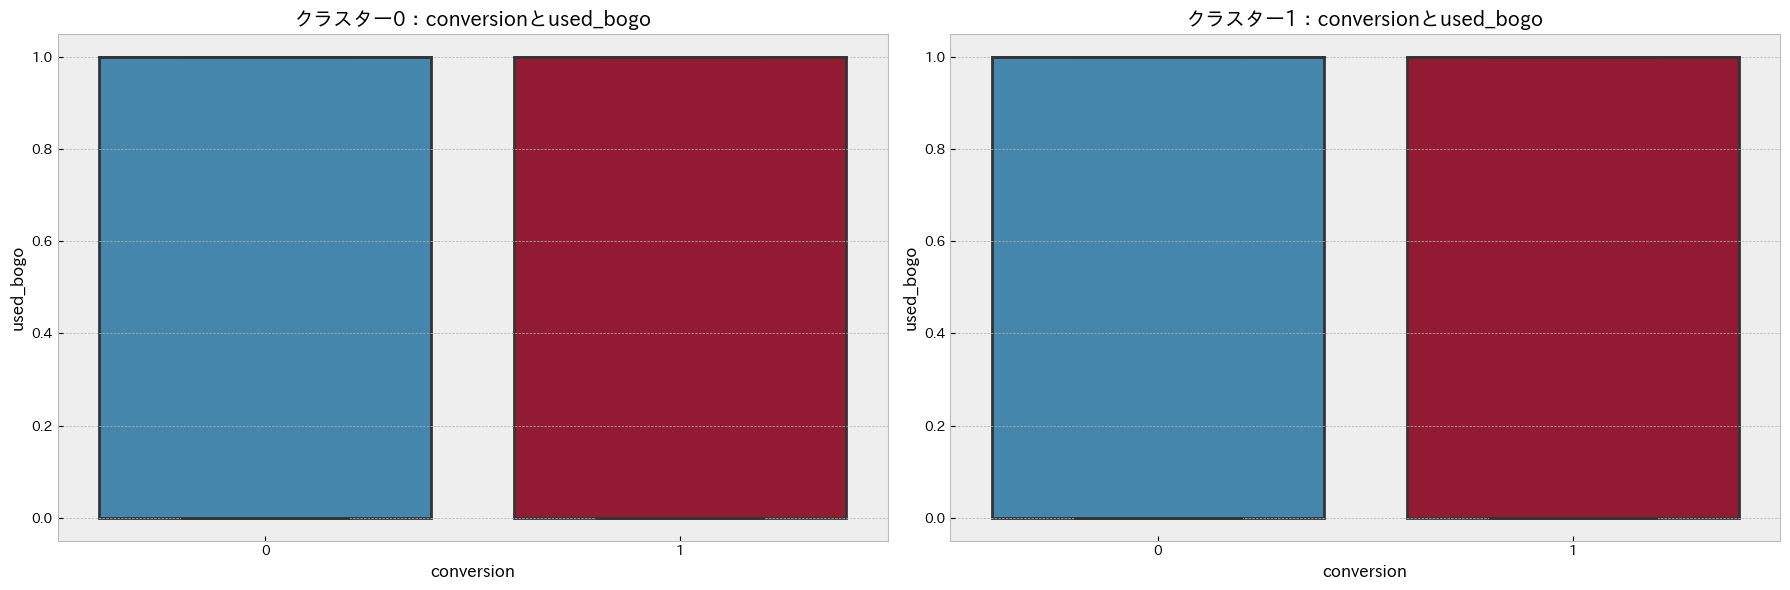

In [ ]:
box_plot('conversion', 'used_bogo', df_list)

In [ ]:
#主成分分析を実行
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=0)

In [ ]:
feature = pca.fit_transform(x_scaled)
feature_df = pd.DataFrame(feature, columns=['conversion', 'used_discount', 'used_bogo'])
new_data = pd.concat([df, feature_df], axis=1)
new_data.head(2)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,cluster,conversion,used_discount,used_bogo
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0,0,-1.473308,-1.031915,-1.971106
1,6,329.08,1,1,Rural,1,Web,No Offer,0,1,0.066038,1.286285,0.414783
